# Chapter4 - Ex2 Loan Prediction Full

## Cho dữ liệu trong thư mục loan_prediction-1 chứa thông tin giao dịch cho vay của một ngân hàng 
* Trong phạm vi bài này, chúng ta chỉ xem xét tập tin X_train.csv và Y_train.csv, dùng để huấn luyện mô hình dự đoán cho vay hay không cho vay. Phân tích thông tin sơ bộ về dữ liệu X_train (với các dữ liệu numeric như: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History). Trực quan hóa dữ liệu. 
* Để việc dự đoán tốt hơn cần phải kiểm tra và chuẩn hóa dữ liệu. Hãy chọn một phương pháp để chuẩn hóa dữ liệu dựa trên thông tin nêu trên. Trực quan hóa kết quả so sánh trước và sau chuẩn hóa.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu. Tìm hiểu sơ bộ về dữ liệu
train_data = pd.read_csv('X_train.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            384 non-null    object 
 1   Gender             384 non-null    object 
 2   Married            384 non-null    object 
 3   Dependents         384 non-null    object 
 4   Education          384 non-null    object 
 5   Self_Employed      384 non-null    object 
 6   ApplicantIncome    384 non-null    int64  
 7   CoapplicantIncome  384 non-null    float64
 8   LoanAmount         384 non-null    int64  
 9   Loan_Amount_Term   384 non-null    int64  
 10  Credit_History     384 non-null    int64  
 11  Property_Area      384 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 36.1+ KB


In [4]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [5]:
# Không có dữ liệu bị null

In [6]:
y_train_data = pd.read_csv('Y_train.csv')
y_train_data.head()

,Target
0,Y
1,Y
2,Y
3,Y
4,Y


In [7]:
y_train_data.value_counts()

Target
Y         271
N         113
dtype: int64

In [8]:
y_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  384 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


In [9]:
y_train_data.isnull().sum()

Target    0
dtype: int64

In [10]:
# Số mẫu cho mỗi loại
y_train_data.value_counts()

Target
Y         271
N         113
dtype: int64

In [11]:
y_train = pd.get_dummies(y_train_data,drop_first=True)
y_train

,Target_Y
0,1
1,1
2,1
3,1
4,1
...,...
379,0
380,1
381,1
382,1


## Áp dụng với việc Scale dữ liệu

In [12]:
train_data_sub = train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
train_data_sub.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4950,0.0,125,360,1
1,2882,1843.0,123,480,1
2,3000,3416.0,56,180,1
3,9703,0.0,112,360,1
4,2333,2417.0,136,360,1


In [13]:
train_data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    384 non-null    int64  
 1   CoapplicantIncome  384 non-null    float64
 2   LoanAmount         384 non-null    int64  
 3   Loan_Amount_Term   384 non-null    int64  
 4   Credit_History     384 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 15.1 KB


In [14]:
# Kiểm tra dữ liệu có bị null hay không
train_data_sub.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [15]:
# Credit_History đã được mã hóa, không cần mã hóa lại
# Loan_Amount_Term đơn vị là tháng
# ApplicantIncome, CoapplicantIncome, LoanAmount đơn vị là USD

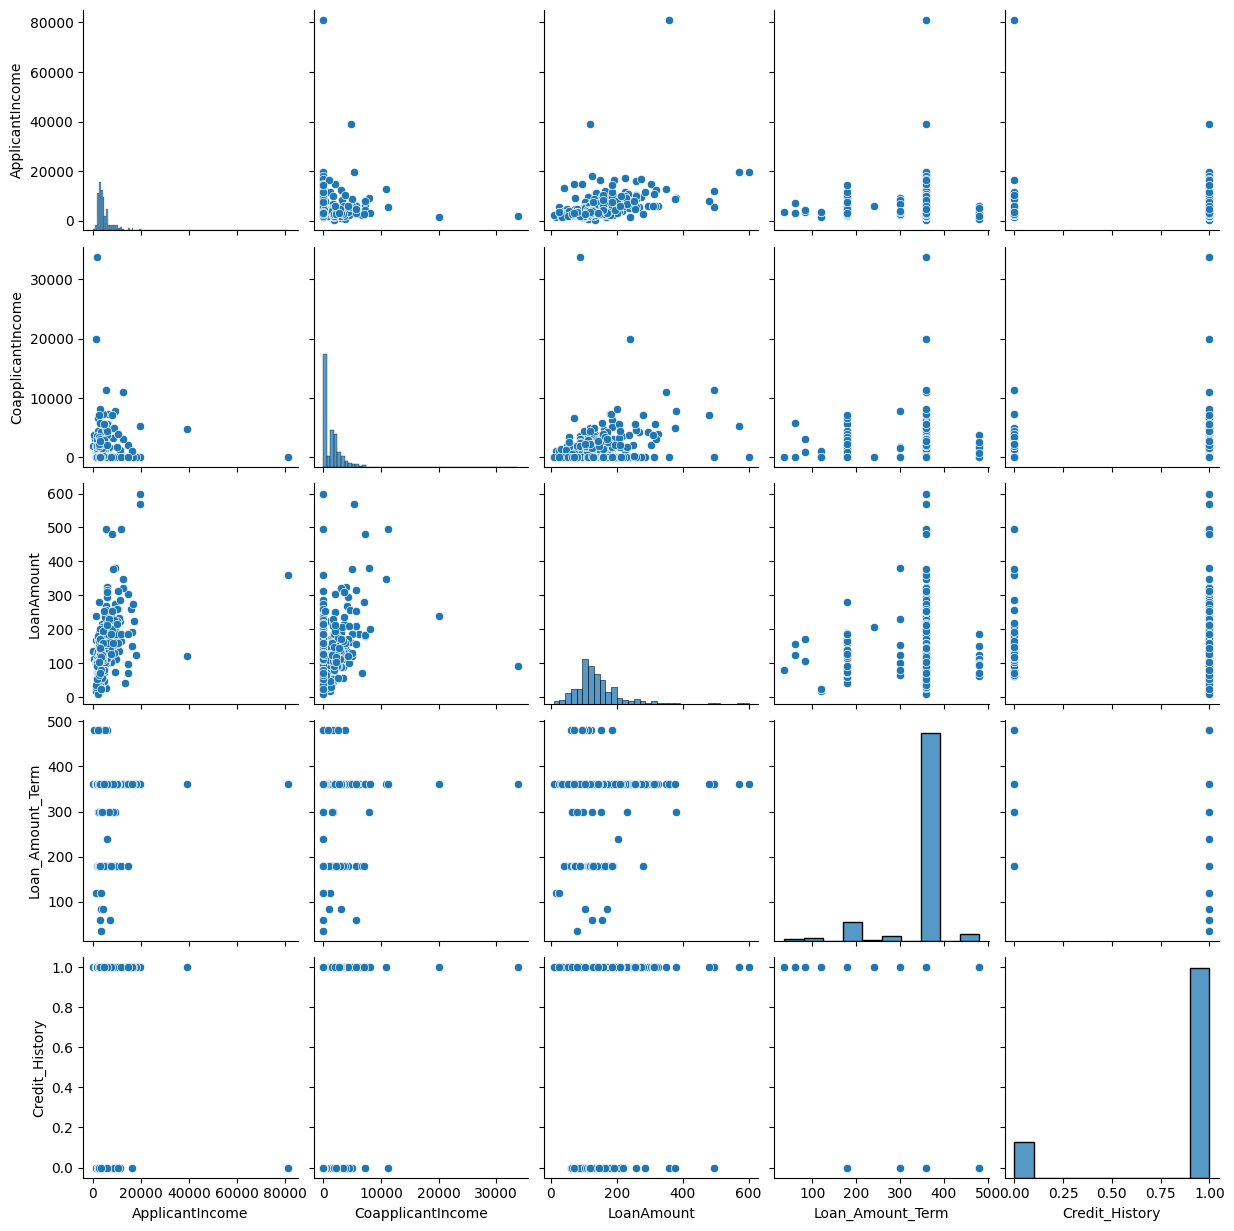

In [16]:
sns.pairplot(data=train_data_sub)

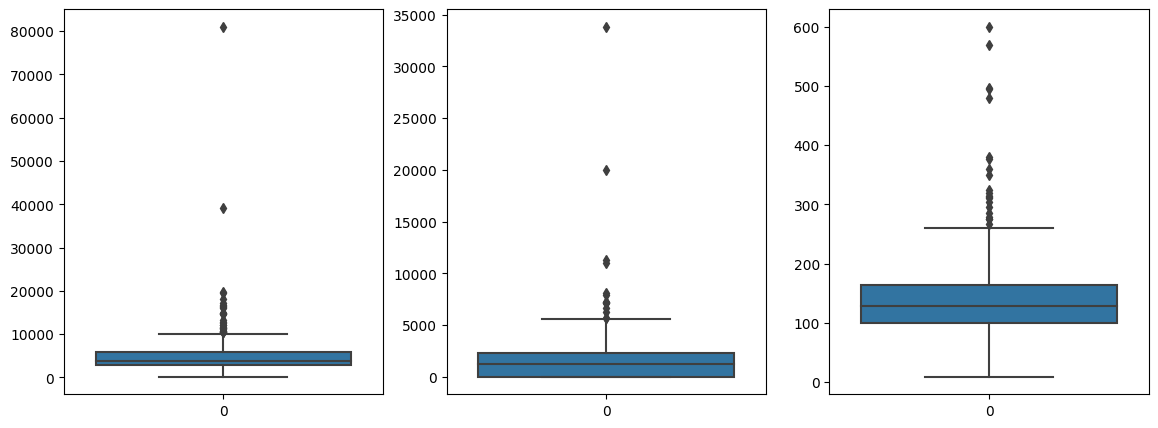

In [17]:
# Phân tích đơn biến. Trực quan hóa dữ liệu. Kiểm tra Outlier
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.boxplot(train_data_sub['ApplicantIncome'])
plt.subplot(1,3,2)
sns.boxplot(train_data_sub['CoapplicantIncome'])
plt.subplot(1,3,3)
sns.boxplot(train_data_sub['LoanAmount'])
plt.show()
# => dữ liệu cột nào cũng có Outlier

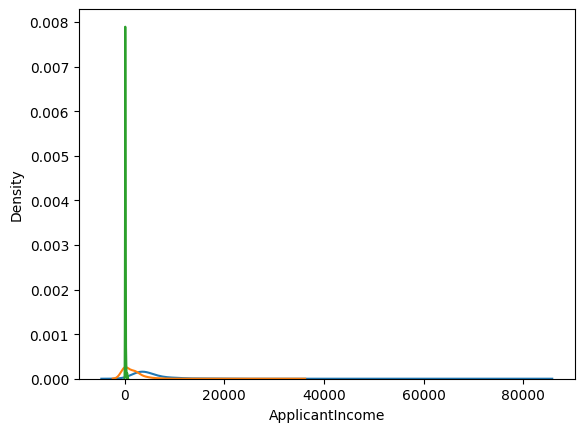

In [18]:
sns.kdeplot(train_data_sub.ApplicantIncome)

sns.kdeplot(train_data_sub.CoapplicantIncome)

sns.kdeplot(train_data_sub.LoanAmount)
plt.show()

In [19]:
# Có một thang dữ liệu khác nhau như sau: Applicanticome 0->8000 USD,LoanAmount 0->600 USD

# Giải pháp 1

In [20]:
# Dữ liệu không phân phối chuẩn -> Xem xét việc loại bỏ outlier -> Áp dụng MinMaxScaler

In [21]:
# Loại bỏ outlier
# train_data_sub['ApplicantIncome']
Q1_App = np.quantile(train_data_sub['ApplicantIncome'],0.25)
Q3_App = np.quantile(train_data_sub['ApplicantIncome'],0.75)
IQR_App = Q3_App-Q1_App
train_data_sub = train_data_sub[(train_data_sub['ApplicantIncome'] <= IQR_App*1.5 + Q3_App) & (train_data_sub['ApplicantIncome'] >= Q1_App - 1.5*IQR_App)]

# train_data_sub['CoapplicantIncome']
Q1_Coa = np.quantile(train_data_sub['CoapplicantIncome'],0.25)
Q3_Coa = np.quantile(train_data_sub['CoapplicantIncome'],0.75)
IQR_Coa = Q3_Coa-Q1_Coa
train_data_sub = train_data_sub[(train_data_sub['CoapplicantIncome'] <= IQR_Coa*1.5 + Q3_Coa) & (train_data_sub['CoapplicantIncome'] >= Q1_Coa - 1.5*IQR_Coa)]
# train_data_sub['LoanAmount']
Q1_Loa = np.quantile(train_data_sub['LoanAmount'],0.25)
Q3_Loa = np.quantile(train_data_sub['LoanAmount'],0.75)
IQR_Loa = Q3_Loa-Q1_Loa
train_data_sub = train_data_sub[(train_data_sub['LoanAmount'] <= IQR_Loa*1.5 + Q3_Loa) & (train_data_sub['ApplicantIncome'] >= Q1_Loa - 1.5*IQR_Loa)]
# Hiển thị sau khi loại bỏ outlier
train_data_sub

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4950,0.0,125,360,1
1,2882,1843.0,123,480,1
2,3000,3416.0,56,180,1
3,9703,0.0,112,360,1
4,2333,2417.0,136,360,1
...,...,...,...,...,...
378,7740,0.0,128,180,1
379,3597,2157.0,119,360,0
380,2583,2167.0,104,360,1
381,5923,2054.0,211,360,1


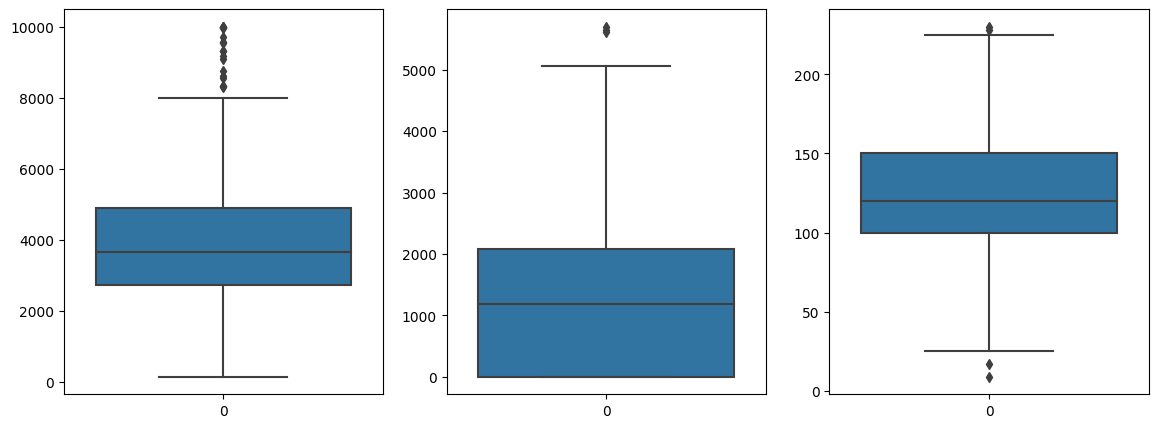

In [22]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.boxplot(train_data_sub['ApplicantIncome'])
plt.subplot(1,3,2)
sns.boxplot(train_data_sub['CoapplicantIncome'])
plt.subplot(1,3,3)
sns.boxplot(train_data_sub['LoanAmount'])
plt.show()

### MinMaxScaler

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
min_max = MinMaxScaler()
X_train_min_max = min_max.fit_transform(train_data_sub)
X_train_min_max

array([[0.48730964, 0.        , 0.52488688, 0.72972973, 1.        ],
       [0.27736041, 0.32327662, 0.5158371 , 1.        , 1.        ],
       [0.2893401 , 0.59919312, 0.21266968, 0.32432432, 1.        ],
       ...,
       [0.24700508, 0.38010875, 0.42986425, 0.72972973, 1.        ],
       [0.58609137, 0.36028767, 0.91402715, 0.72972973, 1.        ],
       [0.28639594, 0.48956323, 0.61085973, 0.72972973, 1.        ]])

In [28]:
df_train_minmax = pd.DataFrame(X_train_min_max,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])
df_train_minmax.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.487310,0.000000,0.524887,0.729730,1.0
1,0.277360,0.323277,0.515837,1.000000,1.0
2,0.289340,0.599193,0.212670,0.324324,1.0
3,0.969848,0.000000,0.466063,0.729730,1.0
4,0.221624,0.423961,0.574661,0.729730,1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


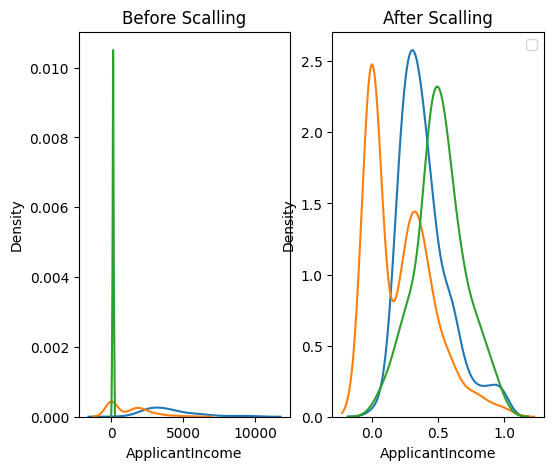

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows= 1,figsize=(6,5))
ax1.set_title('Before Scalling')
sns.kdeplot(train_data_sub['ApplicantIncome'],ax=ax1)
sns.kdeplot(train_data_sub['CoapplicantIncome'],ax=ax1)
sns.kdeplot(train_data_sub['LoanAmount'],ax=ax1)

ax2.set_title('After Scalling')
sns.kdeplot(df_train_minmax['ApplicantIncome'],ax=ax2)
sns.kdeplot(df_train_minmax['CoapplicantIncome'],ax=ax2)
sns.kdeplot(df_train_minmax['LoanAmount'],ax=ax2)
plt.legend()
plt.show()

### Áp dụng thuật toán

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Xây dựng model trên dữ liệu gốc

In [49]:
logistic_models = LogisticRegression()
logistic_models.fit(train_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']],y_train_data)

c:\Users\NK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()